In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import re

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation and non-alphabet characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [2]:
# Load training and validation data from text file
data = []
with open("train.ft.txt", "r", encoding="utf-8") as file:
    for line in file:
        split_line = line.split(" ", 1)
        if len(split_line) > 1:
            label, review = split_line
            label = int(label.replace("__label__", ""))  # Convert '__label__2' to integer
            data.append({"label": label, "review": review.strip()})

# Convert to DataFrame
df = pd.DataFrame(data)

# Preprocess text and map labels to sentiment values (1=positive, 0=negative)
df['processed_review'] = df['review'].apply(preprocess_text)
df['sentiment'] = df['label'].map({1: 0, 2: 1})  # Map labels: 1 = negative, 2 = positive

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(df['processed_review'], df['sentiment'], test_size=0.2, random_state=42)
print(df.head())


   label                                             review  \
0      2  Stuning even for the non-gamer: This sound tra...   
1      2  The best soundtrack ever to anything.: I'm rea...   
2      2  Amazing!: This soundtrack is my favorite music...   
3      2  Excellent Soundtrack: I truly like this soundt...   
4      2  Remember, Pull Your Jaw Off The Floor After He...   

                                    processed_review  sentiment  
0  stuning even for the nongamer this sound track...          1  
1  the best soundtrack ever to anything im readin...          1  
2  amazing this soundtrack is my favorite music o...          1  
3  excellent soundtrack i truly like this soundtr...          1  
4  remember pull your jaw off the floor after hea...          1  


C:\Users\rajao\AppData\Local\Temp\ipykernel_15892\3138914975.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


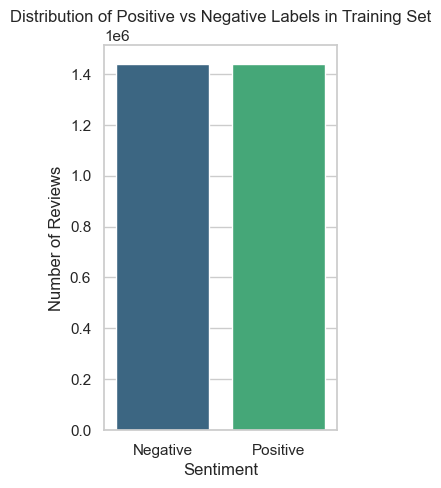

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the style for the plot
sns.set(style="whitegrid")

# Plot the distribution of positive and negative labels in y_train
label_counts = y_train.value_counts()
plt.figure(figsize=(3, 5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")

# Set plot labels and title
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Positive vs Negative Labels in Training Set")
plt.show()

In [4]:
# Load test data from separate text file
test_data = []
with open("test.ft.txt", "r", encoding="utf-8") as file:
    for line in file:
        split_line = line.split(" ", 1)
        if len(split_line) > 1:
            label, review = split_line
            label = int(label.replace("__label__", ""))  # Convert '__label__2' to integer
            test_data.append({"label": label, "review": review.strip()})

# Convert to DataFrame and preprocess
df_test = pd.DataFrame(test_data)
df_test['processed_review'] = df_test['review'].apply(preprocess_text)
df_test['sentiment'] = df_test['label'].map({1: 0, 2: 1})

# Separate test features and labels
X_test = df_test['processed_review']
y_test = df_test['sentiment']


https://openclassrooms.com/en/courses/6532301-introduction-to-natural-language-processing/8081284-apply-a-simple-bag-of-words-approach

In [5]:
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Download WordNet data (only needed once)
nltk.download('wordnet')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a preprocessing function with lemmatization
def lemmatize_text(text):
    tokens = text.split()  # Simple tokenization by spaces
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

# Initialize TF-IDF Vectorizer with lemmatization and n-grams
vectorizer = TfidfVectorizer(max_features=15000, ngram_range=(1, 2), preprocessor=lemmatize_text)

# Fit and transform training data, transform validation and test data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(X_test)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rajao\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
# Initialize and train a logistic regression classifier
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Validate the model on validation set
y_val_pred = model.predict(X_val_tfidf)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))


Validation Accuracy: 0.9265458333333333
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93    359759
           1       0.93      0.93      0.93    360241

    accuracy                           0.93    720000
   macro avg       0.93      0.93      0.93    720000
weighted avg       0.93      0.93      0.93    720000



In [7]:
# Test the model on the test data
y_test_pred = model.predict(X_test_tfidf)

print("\n=== Test Set Predictions vs True Labels ===")
for review, true_label, predicted_label in zip(X_test[20:40], y_test[20:40], y_test_pred[20:40]):
    true_label_name = "Positive" if true_label == 1 else "Negative"  # Assuming labels are 1 (Negative) and 2 (Positive)
    predicted_label_name = "Positive" if predicted_label == 1 else "Negative"
    
    print(f"Review: {review}\nTrue Label: {true_label_name}\nPredicted Label: {predicted_label_name}")
    print("-" * 50)
    
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))


=== Test Set Predictions vs True Labels ===
Review: long and boring ive read this book with much expectation it was very boring all through out the book
True Label: Negative
Predicted Label: Negative
--------------------------------------------------
Review: dont like it this product smells when you open the package and it appears one of the gel cushions leaks so i spent and havent worn then i wouldnt buy this product again dont waste your money on something you may not be able to use
True Label: Negative
Predicted Label: Negative
--------------------------------------------------
Review: one of the last in the series to collect the magazine was in very good condition and had the usual high standard of articles and photos that victoria magazine has come to represent i have collected all the previous magazines of the series and still enjoy leafing through them on a rainy day
True Label: Positive
Predicted Label: Positive
--------------------------------------------------
Review: sony h

In [8]:
import joblib

# Save the trained model and vectorizer
joblib.dump(model, 'sentiment_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [14]:
from flask import Flask, request, jsonify
import joblib

# Load the model and vectorizer
model = joblib.load('sentiment_model.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Initialize Flask app
app = Flask(__name__)


In [11]:
@app.route('/predict', methods=['POST'])
def predict():
    # Get JSON input with the text to analyze
    data = request.get_json()
    review_text = data.get("review", "")

    # Transform text using the saved vectorizer
    text_vector = vectorizer.transform([review_text])

    # Predict sentiment
    prediction = model.predict(text_vector)
    sentiment = 'positive' if prediction[0] == 1 else 'negative'

    # Return JSON response
    return jsonify({'review': review_text, 'sentiment': sentiment})
